In [210]:
import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [352]:
df_salary=pd.read_csv("Salary.csv")

In [353]:
df_salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Converting Categorical data to Numerical Data :

In [354]:
df_salary['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [355]:
# Converting the Rank column to numerical column:
#df_salary["rank"]=df_salary["rank"].map({'Prof':0,'AsstProf':1,'AssocProf':2})
#df_salary["rank"]

In [356]:
#With Label Encoder converting the rank categorical data into numerical data:
    
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_salary['rank']= label_encoder.fit_transform(df_salary['rank'])
 
df_salary['rank'].unique()

array([2, 1, 0])

In [357]:
df_salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500


In [358]:
df_salary['discipline'].unique()

array(['B', 'A'], dtype=object)

In [359]:
#Coverting the "Discipline" categorical value into numerical value:
df_salary['discipline']=df_salary['discipline'].map({'A':0,'B':1})
df_salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500


In [360]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    int32 
 1   discipline     397 non-null    int64 
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 17.2+ KB


In [361]:
df_salary['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [362]:
#Coverting the "sex" categorical value into numerical value:
df_salary['sex']=df_salary['sex'].map({'Male':0,'Female':1})
df_salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,0,139750
1,2,1,20,16,0,173200
2,1,1,4,3,0,79750
3,2,1,45,39,0,115000
4,2,1,40,41,0,141500


In [363]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 17.2 KB


We can see that all the categorical value like rank, disicipline,sex are converted to the numerical values.

In [364]:
df_salary['sex'].unique()

array([0, 1], dtype=int64)

# EDA:

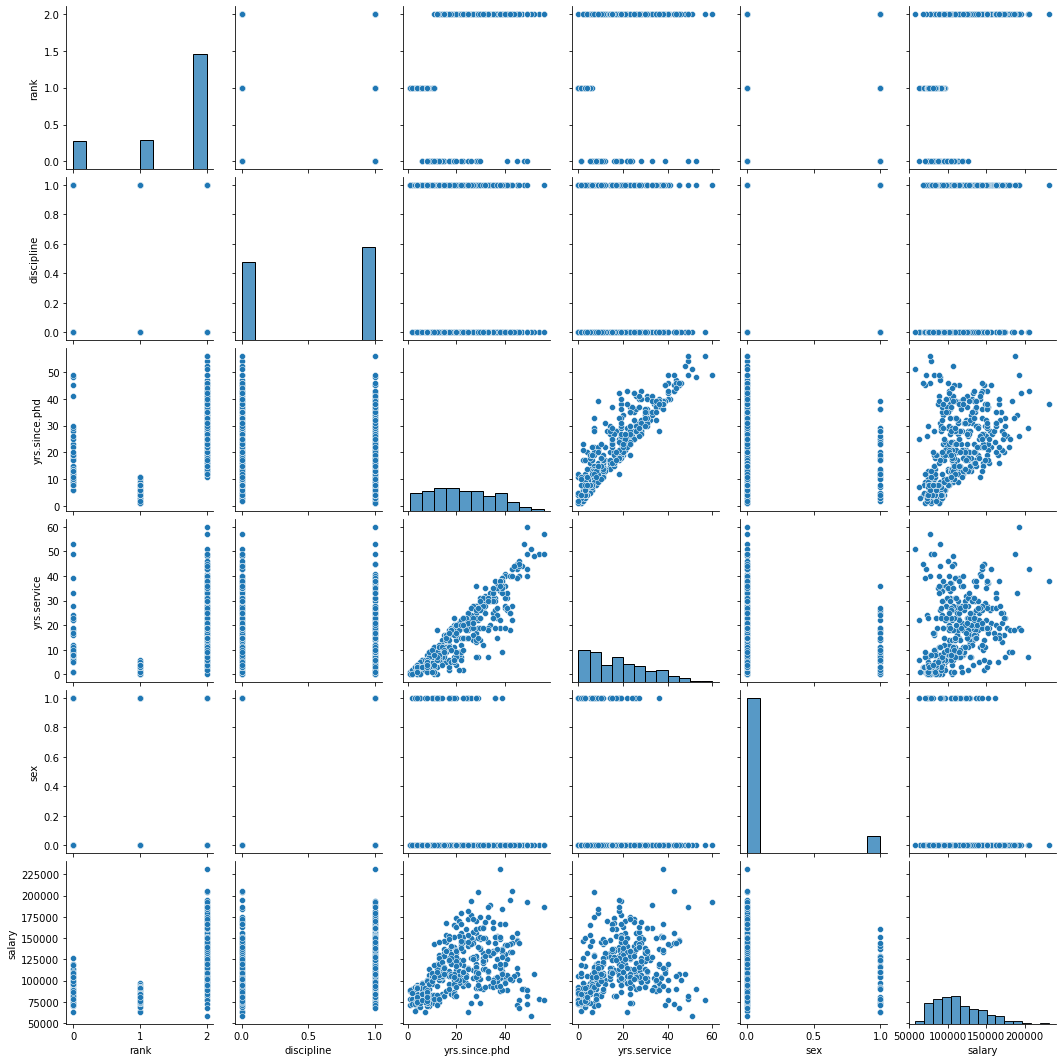

In [365]:
sns.pairplot(df_salary)
plt.show()

I used the pairplot to see the picturization on both scatter and histogram see how the data are distributed.
From the plot we can figure it out that some skewness are present in the data.
For more clear visualisation we can see clearly with histogram and box plot.

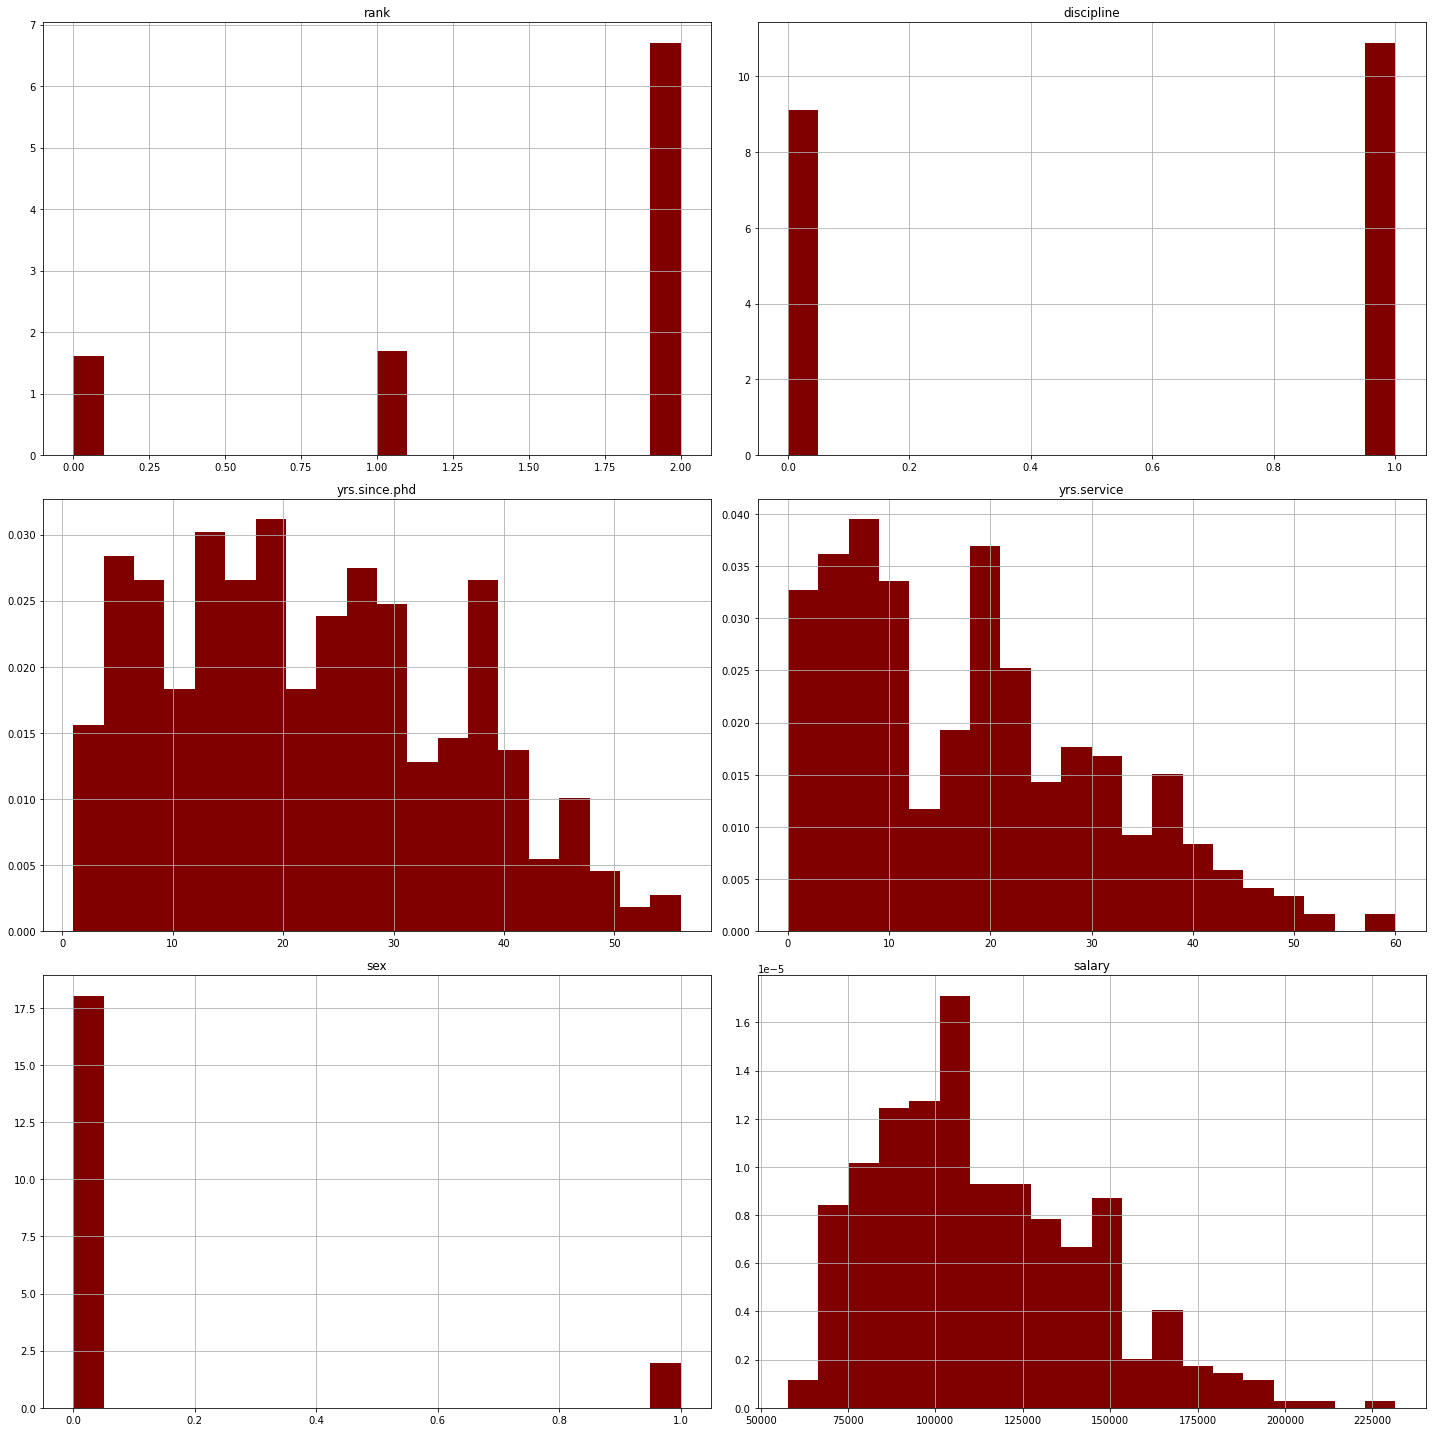

In [366]:
#Using Histogram:
plt.rcParams['figure.figsize']=(20,20)
df_salary.hist(bins=20,color='maroon',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

From the histogram plot we can see that all the columns have either positive or negative skewnees in it.

In [367]:
df_count=df_salary[1:-1]

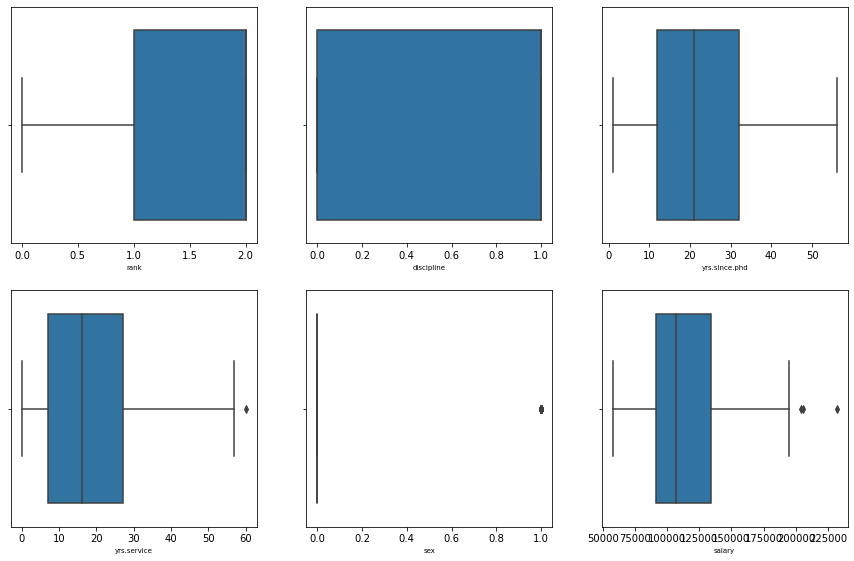

In [368]:
#Visualisation using Box Plot:
plt.figure(figsize=(15,20))
graph=1
for col in df_count:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(df_count[col],orient='v')
        plt.xlabel(col,fontsize=7)
    graph+=1
plt.show()

The above Box Plot shows that we have outliers in two columns they are "yrs.service" and "sex" column

In [369]:
df_salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

<AxesSubplot:>

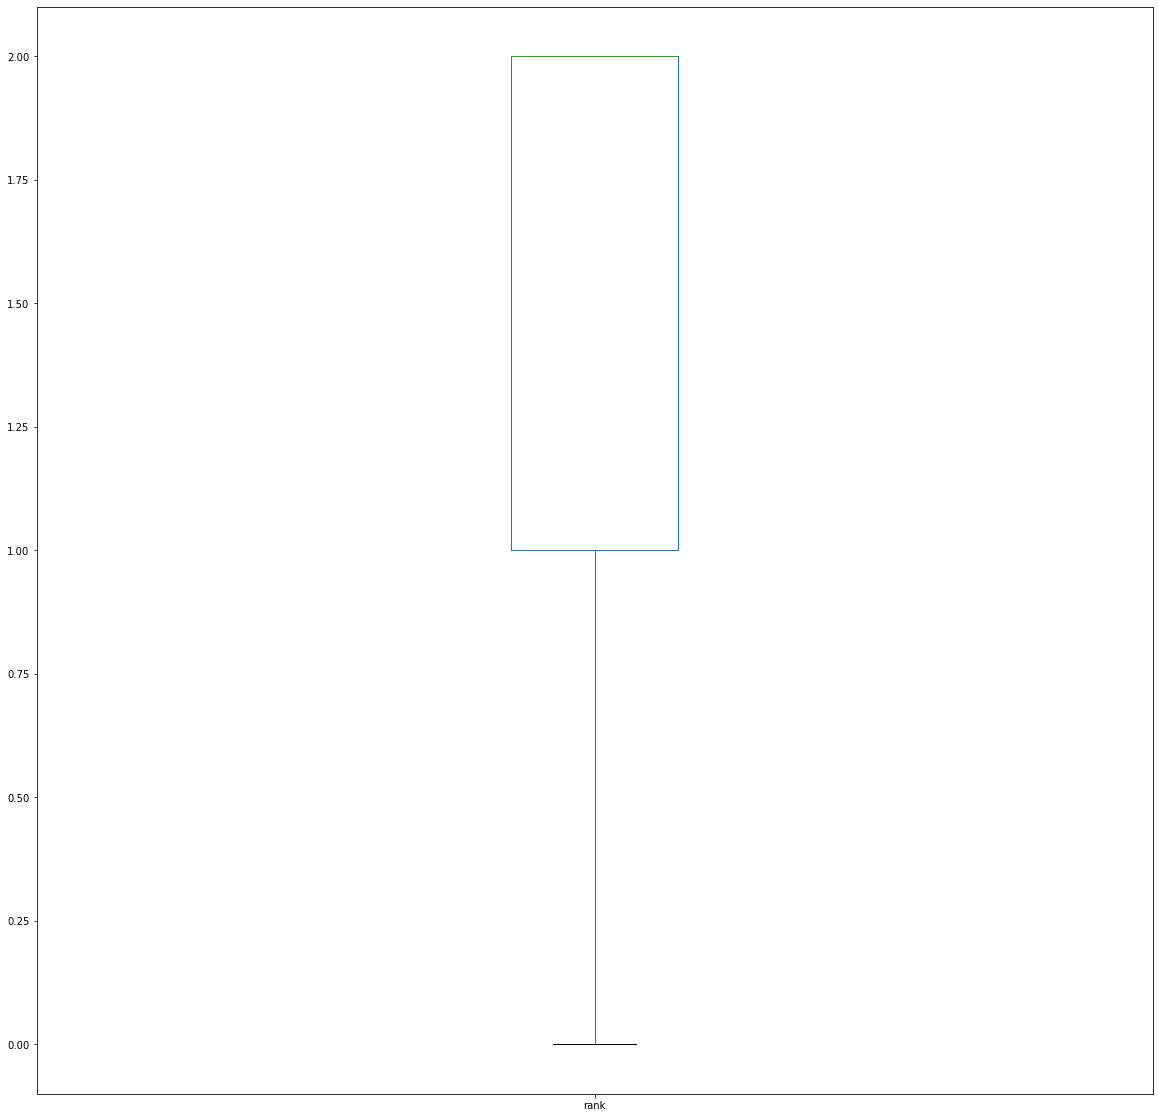

In [370]:
df_salary['rank'].plot.box()

<AxesSubplot:>

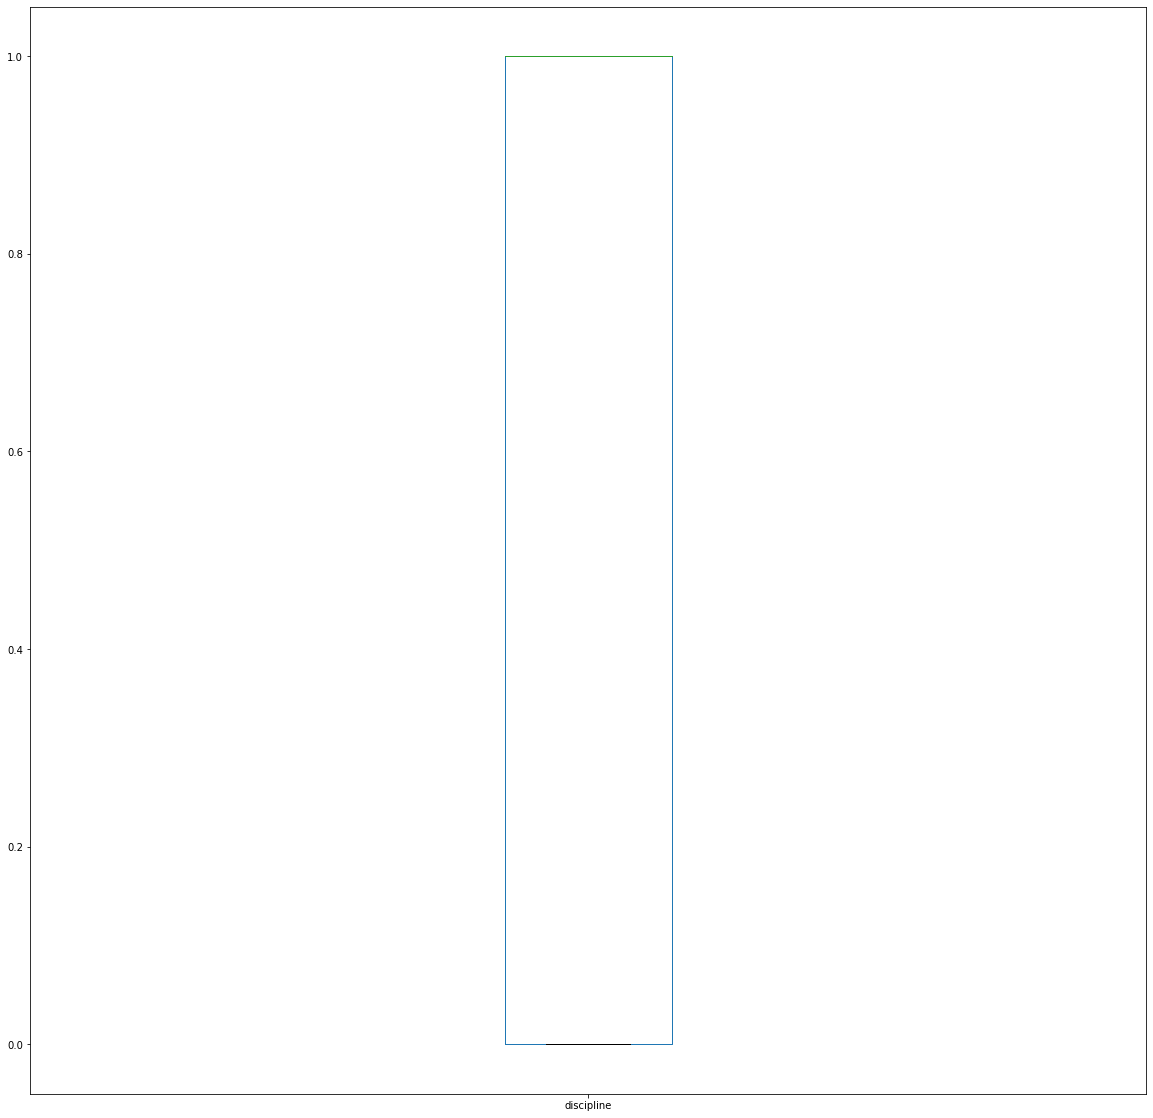

In [371]:
df_salary['discipline'].plot.box()

<AxesSubplot:>

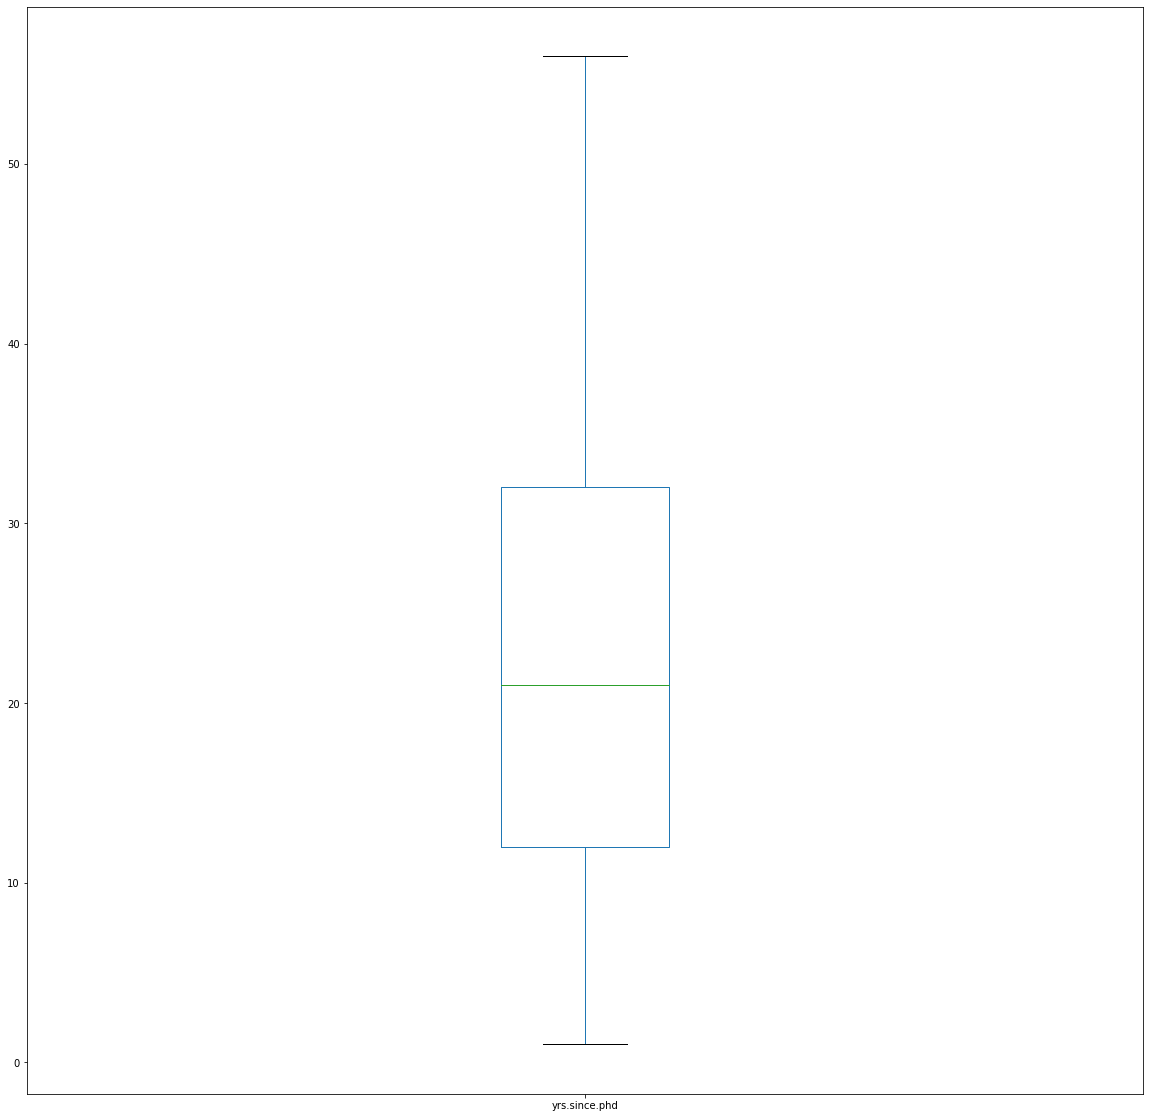

In [372]:
df_salary['yrs.since.phd'].plot.box()

<AxesSubplot:>

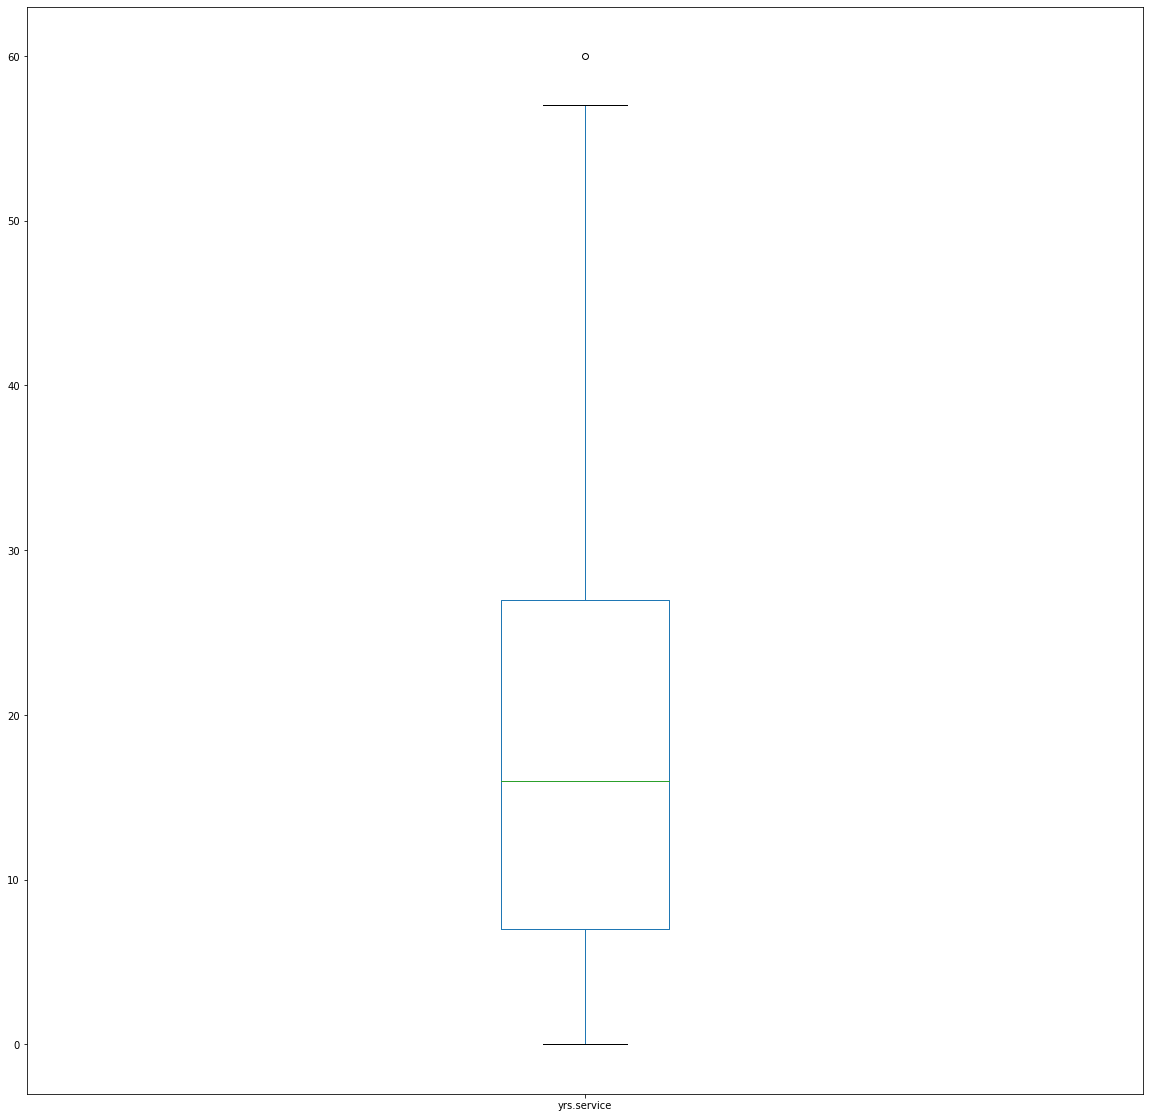

In [373]:
df_salary['yrs.service'].plot.box()

We can see a very small outliers present in the "yrs.service" column.


<AxesSubplot:>

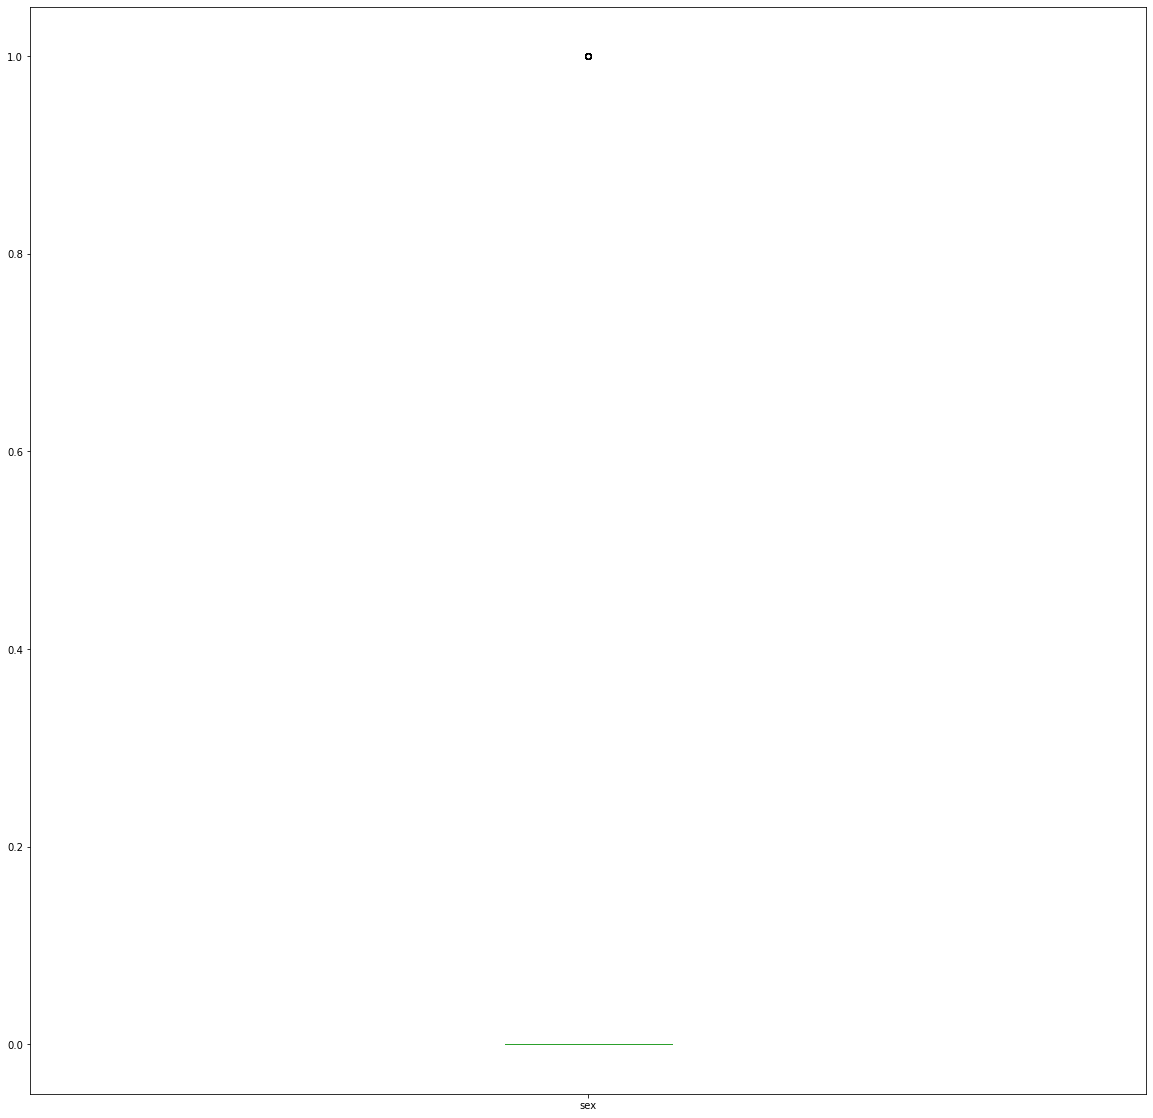

In [374]:
df_salary['sex'].plot.box()

In [375]:
x=df_salary.drop(columns=['salary'])
y=df_salary['salary']

In [376]:
x.shape

(397, 5)

In [377]:
y.shape

(397,)

In [378]:
#To Find the Skewness:
df_salary.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

With the help of the skew method we see columns that are off from the acceptable range of -0.5 to 0.5. This indicates that we have outliers present in our data set that will need to be treated.

In [379]:
# Removeing the Skewness by using Power_Transform method:
#from sklearn.preprocessing import power_transform
#df_salaryNew=power_transform(x,method='yeo-johnson')
#df_salaryNew=pd.DataFrame(df_salaryNew,columns=x.columns)

In [380]:
#import numpy as np
#for col in df_salary.columns:
    #if df_salary.skew().loc[col]>0.55:
        #df_salary[col]=np.log1p(df_salary[col])

In [381]:
df_salary.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

In [382]:
# We can remove the rank column which is not necessary for analysing.
#x=df_salary.drop(columns=['rank'],axis=1)

In [383]:
x.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'], dtype='object')

In [384]:
x=df_salary.drop(columns=['salary'],axis=1)

In [385]:
x.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'], dtype='object')

In [386]:
y=df_salary['salary']

In [387]:
y.shape

(397,)

In [388]:
x.shape

(397, 5)

In [389]:
#removing the Outliers:
from scipy.stats import zscore
z=np.abs(zscore(df_salary))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [390]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


Here we have removed the outliers by fixing the threshold value >3 

In [391]:
#df_salaryNew=df_salary[(z<3).all(axis=1)]

In [392]:
#df_salaryNew.shape

In [393]:
#df_salaryNew.columns

In [394]:
#Correlation:
df_salary.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,-0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,-0.132492,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,0.522207,0.156084,0.419231,0.334745,-0.138610,1.000000


In [395]:
#df_salaryNew

In [396]:
df_salary['sex'].unique()

array([0, 1], dtype=int64)

In [397]:
x.shape

(397, 5)

In [398]:
y.shape

(397,)

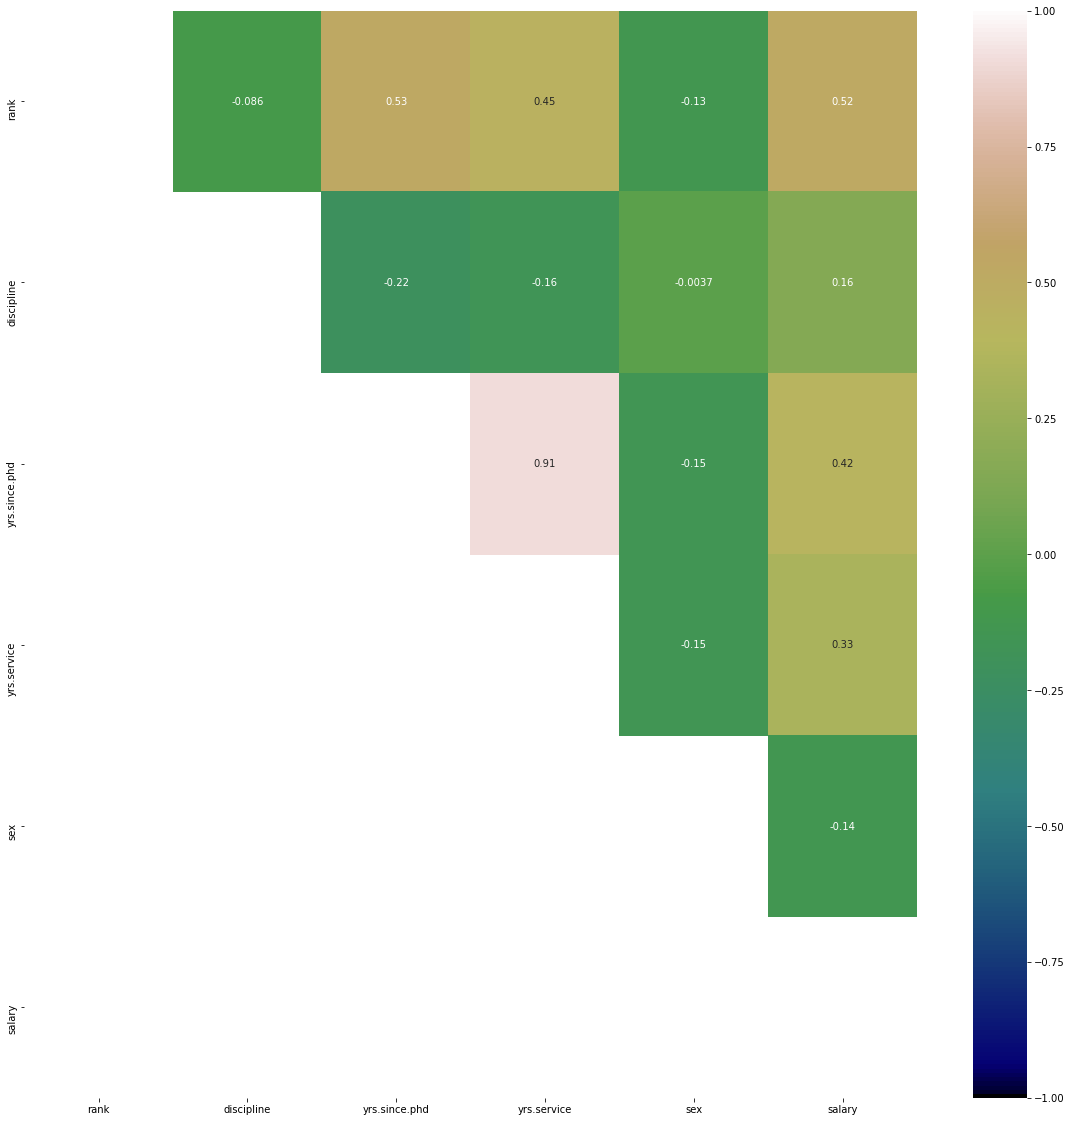

In [399]:
Upper_Triangel=np.tril(df_salary.corr())
#plt.figure(figsize=(10,10))
sns.heatmap(df_salary.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap="gist_earth",mask=Upper_Triangel)
plt.show()

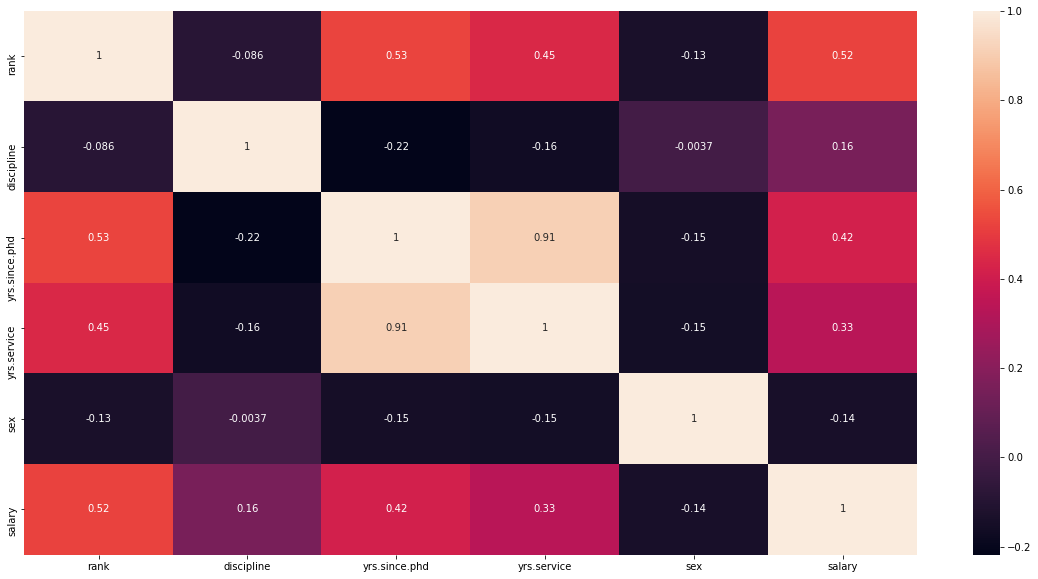

In [400]:
corr_hmap=df_salary.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

From the Heat map we can see that sex column have only Male(0).

# Creating Train and Test dataset:

In [401]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.40, random_state=42, shuffle=True)

# Machine Learning Model for Regression:

In [402]:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features='sqrt')
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

Here i have intialised five Regression algorithm linear regression, support vector regression, decision tree regressor, random forest regressor and k neighbors regressor. Used the sklearn page to use the correct parameters for each of the models.

In [403]:
# Traing the models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

Here we have trained all the ression model by feeding them with trainning data set.

In [404]:
# Predictions:
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

Once the models are trained i am now predecting the label and storing the values in predicted variables


In [405]:
#Evaluation Metrics:
#RMSE-Root Mean Square a lesser RMSE is better than higher one

mse_linear = mean_squared_error(y_test, pred_linear)
mse_svr = mean_squared_error(y_test, pred_svr)
mse_dtr = mean_squared_error(y_test, pred_dtr)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_knr = mean_squared_error(y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)
rmse_dtr = sqrt(mse_dtr)
rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  24812.361698607085
RMSE of Support Vector Regression is:  26616.47266405144
RMSE of Decision Tree Regressor is:  32860.494474176754
RMSE of Random Forest Regressor is:  23457.02365961816
RMSE of K Neighbors Regressor is:  31578.999527965392


In [406]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(y_test, pred_svr, multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor is: ", r2_score(y_test, pred_dtr, multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor is: ", r2_score(y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  28.11549149047712
R2 Score for Support Vector Regression is:  17.28198549000316
R2 Score for Decision Tree Regressor is:  -26.08031623715288
R2 Score for Random Forest Regressor is:  35.75417465910825
R2 Score for K Neighbors Regressor is:  -16.43829418823566


# HyperParameter Tuning:

In [407]:
# Linear Regression

lt_param = {'fit_intercept' : [True,False], 'normalize' : [True,False], 
            'copy_X' : [True,False], 'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

In [408]:
RSCV = RandomizedSearchCV(LinearRegression(), lt_param, cv=5)

In [409]:
RSCV.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [410]:
Final_Model = LinearRegression(positive=True, normalize=True, n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)


R2 score for the Final Model is: 27.893444786501533


Done HyperParameter tuning but even then the R2 score is very less.So i am now trying to do Lasso,Ridge moel in LinearRegression:

In [411]:
from sklearn.linear_model import Lasso,Ridge

In [412]:
# will reduce the Coefficient to zero (thoes features are not informative )
#alpha values could be ---->.0001,.01,1,10-----> higher values reduce all coefficients towards 0 and impact output
#default alpha value is 1.0
#alpha=.01
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.predict(x_test)
ls.score(x_train,y_train)

0.42367355069287504

In [413]:
LsPred=ls.predict(x_test)

In [414]:
data=pd.DataFrame({"Actual_Value":y_test,"Predict_Value":LsPred})

In [415]:
data.head()

,Actual_Value,Predict_Value
114,105000,96797.561809
278,107100,112429.025661
237,63100,76980.017673
57,90215,87904.219172
72,100131,136936.094503


In [416]:
ls.coef_

array([15935.34353952, 20298.39107211,   832.40763474,    46.63959615,
       -4803.05950512])

In [417]:
print('Error:')
print("Mean absolute error:",mean_absolute_error(y_test,LsPred))
print("Mean squared error:", mean_squared_error(y_test,LsPred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,LsPred)))

Error:
Mean absolute error: 18684.650991858238
Mean squared error: 615653290.9920338
Root Mean Squared Error: 24812.361656884535


In [418]:
from sklearn.model_selection import GridSearchCV

In [419]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
grid=GridSearchCV(estimator=ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.29570517244481886
1
{'alpha': 1}


In [420]:
# try to min the coefficent variances
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.42367355069177515

In [421]:
# ElasticNet is a combination of both Lasso and Ridgem
from sklearn.linear_model import ElasticNet 
enr=ElasticNet(alpha=0.01)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.4236083126583182


array([15743.4958454 , 19867.49083632,   833.51495661,    48.76152192,
       -4464.47546632])

In [422]:
from sklearn.model_selection import cross_val_score

In [423]:
cv_results=cross_val_score(linear_model,x,y,cv=5)
msg="%s: %f (%f)"%('Linear Regression',cv_results.mean(),cv_results.std())
print(msg)

Linear Regression: 0.295699 (0.121171)


# Saving the Model using Pickel or joblib

In [424]:
import pickle
filename='FinalModel.pkl'
pickle.dump(ls,open(filename,'wb'))

The final model which i took is Lasso Model because only in the Lasso model th score is 42% rest of the model the score is very less. Now i am going to serialize the final model usig pickle method as object file so that we can use this model later for other dataset.

# Loading the Model:

In [425]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(x_test,y_test)*100
print(result)

28.11549173222797


I have loaded the saved model and passed the unseen data set to predict the model score